In [132]:
# Просто база 
import numpy as np
import pandas as pd

# Тематические библиотеки
import geopandas as gpd
import pycountry_convert as pcc
import random
import json
from urllib.request import urlopen

# Визуализация 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from IPython.display import display

# Общее
Максимально использовать Pandas и Plotly или Bokeh или GeoPandas (для визуализации карты Мира со странами). Применение излишних циклов ведет к снижению баллов (циклы - ЗЛО). Применение ненужных функций - аналогично. Используйте apply, map и lambda по максимуму. Помним про корректное применение сортировок.

Вспоминаем английский:

csv_airports_v1.csv:
- `Airport ID`	Unique OpenFlights identifier for this airport.
- `Name of airport`. May or may not contain the City name.
- `City`	Main city served by airport. May be spelled differently from Name.
- `Country`	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.
- `IATA`	3-letter IATA code. Null if not assigned/unknown.
- `ICAO`	4-letter ICAO code. Null if not assigned.
- `Latitude`	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- `Longitude`	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- `Altitude`	In feet.
- `Timezone`	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- `DST`	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- `Tz database timezone`	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".


csv_routes_v1.csv:
- `Airline`	2-letter (IATA) or 3-letter (ICAO) code of the airline.
- `Airline ID`	Unique OpenFlights identifier for airline (see Airline).
- `Source airport`	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- `Source airport ID`	Unique OpenFlights identifier for source airport (see Airport)
- `Destination airport`	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- `Destination airport ID`	Unique OpenFlights identifier for destination airport (see Airport)
- `Equipment`	3-letter codes for plane type(s) generally used on this flight, separated by spaces

## Задание 1 
Скачать данные из `csv_airports_v1.csv` и `csv_routes_v1.csv` в виде датафрейма в переменные `airports` и `routes`.

In [133]:
# скачиваем данные 
airports = pd.read_csv('csv_airports_v1.csv')
routes = pd.read_csv('csv_routes_v1.csv')

# Проверка типа переменных airports и routes (опционально)

# print(isinstance(airports, pd.DataFrame), isinstance(routes, pd.DataFrame))

In [134]:
display(airports)

,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby
...,...,...,...,...,...,...,...,...,...,...,...,...
7692,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N
7693,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N
7694,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N
7695,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N


In [135]:
display(routes)

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Equipment
0,2B,410,ASF,2966,KZN,2990,CR2
1,2B,410,ASF,2966,MRV,2962,CR2
2,2B,410,CEK,2968,KZN,2990,CR2
3,2B,410,CEK,2968,OVB,4078,CR2
4,2B,410,DME,4029,KZN,2990,CR2
...,...,...,...,...,...,...,...
67657,ZL,4178,WYA,6334,ADL,3341,SF3
67658,ZM,19016,DME,4029,FRU,2912,734
67659,ZM,19016,FRU,2912,DME,4029,734
67660,ZM,19016,FRU,2912,OSS,2913,734


## Задание 2. 
1. Вывести `info` по датафреймам.
2. Обратите внимание, что в `csv_airports_v1.csv` пропущенные данные закодированы как `\N` заменить их на стандартные `np.nan`
3. Повторно посмотреть `info` по датафреймам.

### Пункт 2.1 (выводим info по DF)

In [136]:
display(airports.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  7697 non-null   object 
 5   ICAO                  7697 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7697 non-null   object 
 10  DST                   7697 non-null   object 
 11  Tz database timezone  7697 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB


None

In [137]:
display(routes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 67662 non-null  object
 1   Airline ID              67662 non-null  object
 2   Source airport          67662 non-null  object
 3   Source airport ID       67662 non-null  object
 4   Destination airport     67662 non-null  object
 5   Destination airport ID  67662 non-null  object
 6   Equipment               67644 non-null  object
dtypes: object(7)
memory usage: 3.6+ MB


None

### Пункт 2.2 (заменяем значения '\N' на 'np.nan')

In [138]:
airports.replace('\\N', np.nan, inplace=True) 

### Пункт 2.3 (выводим info по DF повторно)

In [139]:
display(airports.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  6071 non-null   object 
 5   ICAO                  7696 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7344 non-null   object 
 10  DST                   7344 non-null   object 
 11  Tz database timezone  6676 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB


None

In [140]:
display(routes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 67662 non-null  object
 1   Airline ID              67662 non-null  object
 2   Source airport          67662 non-null  object
 3   Source airport ID       67662 non-null  object
 4   Destination airport     67662 non-null  object
 5   Destination airport ID  67662 non-null  object
 6   Equipment               67644 non-null  object
dtypes: object(7)
memory usage: 3.6+ MB


None

## Задание 3. 
1. Срезать данные в `airports` по наличию кода `IATA` в переменую `iata_arports`, отвяжите новую табличку от `airports`
2. В `iata_arports` добавьте столбец `Continents` с названием континента, на котором размещен аэропорт (Северная и Южная Америка разные континенты, Россия в Европе, Турция в Азии). 

### Пункт 3.1 (Срез данных)

In [141]:
# iata_airports = airports[airports['IATA'].notnull()] 
# print(display(iata_airports.head())) # опционально

# 3.1 Срез данных по наличию IATA и отрыв копией
iata_airports = airports[airports['IATA'].notna()].copy()

# опционально: быстрый взгляд
display(iata_airports.head())

,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby


### Пункт 3.2 (нагло и бесцеремонно тырим наработки с семинара!) 

In [142]:
country_dict = {
    'Republic of Congo' : 'Africa', 
    'Virgin Islands, US' : 'Oceania',
    'Virgin Islands': 'North America',
    'UK' : 'Europe', 
    'Saint Kitts' : 'North America', 
    'Trinidad' : 'North America', 
    'Saint Vincent': 'North America', 
    'Curacao': 'North America', 
    'Timor-Leste': 'Oceania', 
    'Boliva' : 'South America',
    'Antigua' : 'North America',
    'Kosovo' : 'Europe', 
    "Cote d'Ivoire" : 'Africa', 
    'Congo (Brazzaville)' : 'Africa', 
    'Congo (Kinshasa)' : 'Africa', 
    'Saint Helena' : 'Africa', 
    'Reunion' : 'Africa', 
    'Midway Islands' : 'North America', 
    'Antarctica' : 'Antarctica', 
    'Virgin Islands' : 'North America', 
    'Netherlands Antilles':'South America', 
    'Burma' : 'Asia',
    'East Timor' : 'Asia',
    'Johnston Atoll' : 'North America',
    'Western Sahara' : 'Africa',
    'Wake Island' : 'North America', 
    'Papua New Guinea': 'Oceania',
    'West Bank': 'Asia'
    }
def country_to_continent2(country_name):
    try:
        country_alpha2 = pcc.country_name_to_country_alpha2(country_name)
        country_continent_code = pcc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pcc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return country_dict[country_name]

iata_airports['Continents'] = iata_airports['Country'].map(country_to_continent2)
iata_airports[iata_airports['Continents'].isnull()]['Country'].unique()

array([], dtype=object)

## Задание 4.
Реализовать случайный выбор континента и на карте Мира нанести точки аэропортов `iata_arports` для выбранного континента.

Реализуйте все континенты на отдельных `subplots`.
Нашли обшибки в данных, если да то какие?

In [125]:
# iata_arports

# Функция, которая рандомным образом выбирает континент 
continent_list = ['Oceania', 'North America', 'Europe', 'Africa', 'South America', 'Asia', 'Antarctica']
def choose_random_continent(continent_list):
    return random.choice(continent_list) 

random_continent = choose_random_continent(continent_list)
# print(random_continent) # штука, чтобы проверить работает ли она, она работает...

In [126]:
random_continent

'Oceania'

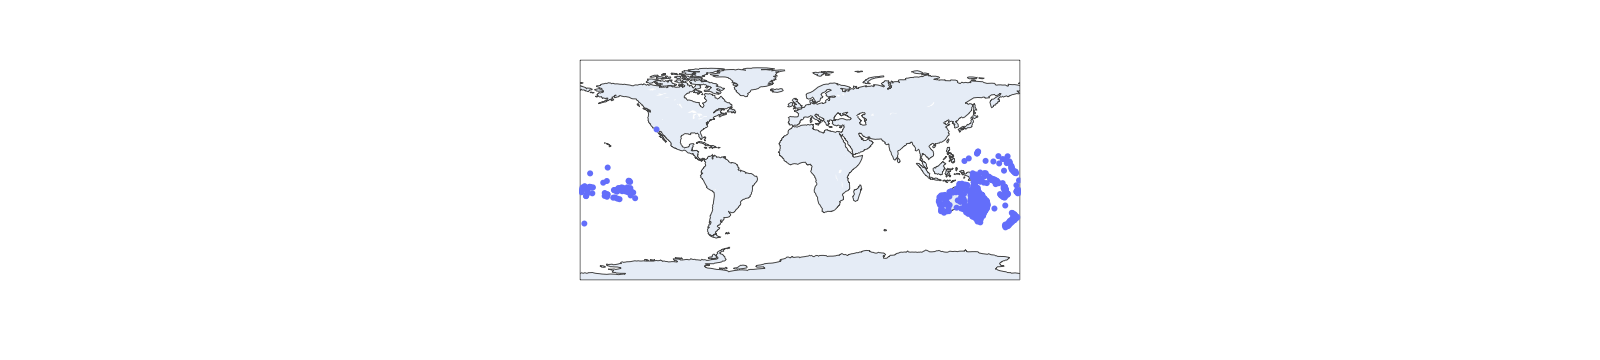

In [127]:
# iata_arports
# 5.1 
# Тк мы люди рациональные, то график должен быть привязан к данным и мы должны создать своеобразную фильтрацию 
random_continent_data = iata_arports[iata_arports['Continents'] == random_continent] 
# print(random_continent_data)

# help(px.scatter_geo) # мой помогатор 
# материал, который использовался для графика https://youtu.be/Oht6cf-Acl0?si=oAB9mOIO2Z9K16uZ

fig = px.scatter_geo(random_continent_data, 
                        lat='Latitude', 
                        lon='Longitude', 
                        hover_name="City", 
                        hover_data=["Name of airport"]) 
                        # zoom=1, 
                        # height=300, 
                        # mapbox_style = 'stamen-watercolor')

fig.show()

## Найденные ошибки 

1. Очень странная штука, но в одной базе код IATA есть, а в другой нет... Те самолет вроде и числиться, а вроде и нет
2. Был замечен странный разброс/те условно Тимор был отнесен к Океании, а не к Азии и так еще несколько случаев 
3. Я вот не знаю это ошибка или нет, но я видел случай, где часовой пояс не совпадал с расположением
4. Есть несостыковки континентов и расположения городов - проблема в данных 

## Задание 5.
1. На основе таблиц `iata_arports` и `routes` рассчитать количество взлетов и посадок для каждой страны случайно выбранного континента собрать таблицу: индексы - страна, колонки - взеты и посадки. Упорядочить по названию страны.
2. Используя собранные данные - залить страны на карте континента по интенсивности взлет/посадок (сумма)(как пример https://plotly.com/python/mapbox-county-choropleth/).  Страна с отсутствующими данными имеет черный или белый цвет (как вам нравится).

In [128]:
# print(display(iata_arports.head(3))) # (6071, 13)
# print(display(routes.head(3))) # 67662, 7)

Добавьте в overrides следующие страны: ['Virgin Islands']


,departures,arrivals
Country,,
Albania,36,36
Austria,388,388
Belarus,54,54
Belgium,412,410
Bosnia and Herzegovina,23,23
Bulgaria,89,89
Croatia,204,205
Czech Republic,192,193
Denmark,309,309


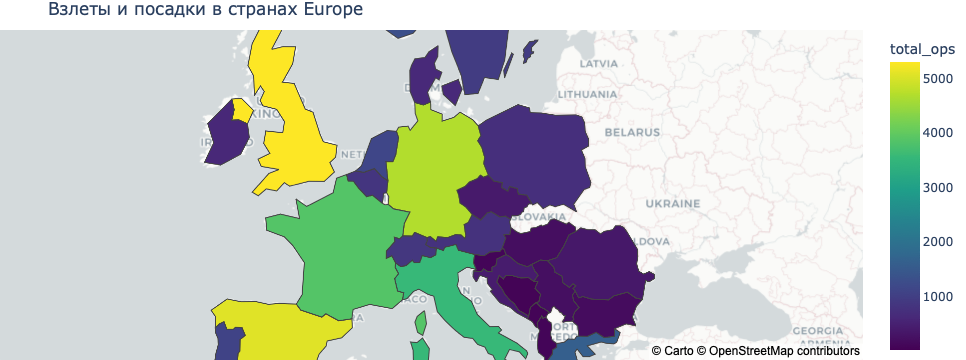

In [145]:

# Это навсякий случай, можно это не делать, но я сделал...
airports = pd.read_csv('csv_airports_v1.csv', na_values='\\N')
routes   = pd.read_csv('csv_routes_v1.csv')

# Оставляем аэропорты с IATA и создаем копию, не хочу ошибок, тк если не делать копию они возникают, а это раздражает 
iata_airports = airports[airports['IATA'].notna()].copy()

# Словарь-исключения для редких названий стран
overrides = {
    'Republic of Congo'    : 'Africa',
    'Virgin Islands, US'   : 'North America',
    'UK'                   : 'Europe',
    'Saint Kitts'          : 'North America',
    'Trinidad'             : 'North America',
    'Saint Vincent'        : 'North America',
    'Curacao'              : 'North America',
    'Timor-Leste'          : 'Oceania',
    'Boliva'               : 'South America',
    'Antigua'              : 'North America',
    'Kosovo'               : 'Europe',
    "Cote d'Ivoire"        : 'Africa',
    'Congo (Brazzaville)'  : 'Africa',
    'Congo (Kinshasa)'     : 'Africa',
    'Saint Helena'         : 'Africa',
    'Reunion'              : 'Africa',
    'Midway Islands'       : 'North America',
    'Antarctica'           : 'Antarctica',
    'Netherlands Antilles' : 'South America',
    'Burma'                : 'Asia',
    'East Timor'           : 'Asia',
    'Johnston Atoll'       : 'North America',
    'Western Sahara'       : 'Africa',
    'Wake Island'          : 'North America',
    'West Bank'            : 'Asia'
}

def country_to_continent(country_name: str) -> str:
    try:
        alpha2    = pcc.country_name_to_country_alpha2(country_name)
        cont_code = pcc.country_alpha2_to_continent_code(alpha2)
        return pcc.convert_continent_code_to_continent_name(cont_code)
    except Exception:
        return overrides.get(country_name)

if 'Continents' in iata_airports.columns:
    iata_airports.rename(columns={'Continents':'Continent'}, inplace=True)
iata_airports.loc[:, 'Continent'] = iata_airports['Country'].apply(country_to_continent)

missing = iata_airports.loc[iata_airports['Continent'].isna(), 'Country'].unique()
if len(missing):
    print("Добавьте в overrides следующие страны:", missing)

# Выбор континента для анализа
selected_continent = 'Europe'
airports_cont = (
    iata_airports
    .loc[iata_airports['Continent'] == selected_continent, ['IATA','Country']]
    .copy()
)

# Считаем вылеты и посадки для аэропортов на выбранном континенте
dep = (
    routes.loc[routes['Source airport'].isin(airports_cont['IATA'])]
          .merge(airports_cont, left_on='Source airport', right_on='IATA')
)
arr = (
    routes.loc[routes['Destination airport'].isin(airports_cont['IATA'])]
          .merge(airports_cont, left_on='Destination airport', right_on='IATA')
)

dep_counts = dep['Country'].value_counts().rename('departures')
arr_counts = arr['Country'].value_counts().rename('arrivals')

# Собираем финальную таблицу и сортируем по алфавиту стран
country_stats = (
    pd.concat([dep_counts, arr_counts], axis=1)
      .fillna(0)
      .astype(int)
      .sort_index()
)
display(country_stats)

gap = px.data.gapminder().query("year==2007")[['country','iso_alpha']]
map_data = (
    country_stats
    .reset_index()
    .rename(columns={'index':'Country'})
    .merge(gap, left_on='Country', right_on='country', how='left')
)
map_data['total_ops'] = map_data['departures'] + map_data['arrivals']

with urlopen('https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json') as resp:
    geojson = json.load(resp)

fig = px.choropleth_mapbox(
    map_data,
    geojson=geojson,
    locations='iso_alpha',
    color='total_ops',
    hover_name='Country',
    mapbox_style='carto-positron',
    color_continuous_scale='Viridis',
    zoom=3, center={'lat':50,'lon':10},
    title=f"Взлеты и посадки в странах {selected_continent}"
)
fig.update_layout(margin={'r':0,'t':30,'l':0,'b':0})
fig.show()

## Задание 6.
Для каждого континента найти 10 самых крупных аэропортов. Результат в виде датафрейма. Иерархический индекс: 1 уровень континенты по алфавиту, 2 уровень название аэропорта. В столбцах страна, город, код IATA и количество взлет посадок. Внутри континента аэропорты упорядочены по взлет/посадкам от наибольшего к наимельшему.

Нанести на карту Мира данные аэропорты разным цветом в зависимости от континента.

iata_airports columns: ['Airport ID', 'Name of airport', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database timezone', 'Continents']

Топ-10 самых больших аэропортов по континентам:


Country  \
Continent     Airport Name                                                               
Africa        Addis Ababa Bole International Airport                          Ethiopia   
              Cairo International Airport                                        Egypt   
              Houari Boumediene Airport                                        Algeria   
              Jomo Kenyatta International Airport                                Kenya   
              Léopold Sédar Senghor International Airport                      Senegal   
              Menara Airport                                                   Morocco   
              Mohammed V International Airport                                 Morocco   
              Murtala Muhammed International Airport                           Nigeria   
              OR Tambo International Airport                              South Africa   
              Tunis Carthage International Airport                             Tunisia   
Asia          Beijing Capital International Airport                              China   
              Chengdu Shuangliu International Airport                            China   
              Dubai International Airport                         United Arab Emirates   
              Guangzhou Baiyun International Airport                             China   
              Hong Kong International Airport                                Hong Kong   
              Incheon International Airport                                South Korea   
              Istanbul Airport                                                  Turkey   
              Shanghai Pudong International Airport                              China   
              Singapore Changi Airport                                       Singapore   
              Suvarnabhumi Airport                                            Thailand   
Europe        Adolfo Suárez Madrid–Barajas Airport                               Spain   
              Amsterdam Airport Schiphol                                   Netherlands   
              Barcelona International Airport                                    Spain   
              Charles de Gaulle International Airport                           France   
              Domodedovo International Airport                                  Russia   
              Frankfurt am Main Airport                                        Germany   
              Leonardo da Vinci–Fiumicino Airport                                Italy   
              London Gatwick Airport                                    United Kingdom   
              London Heathrow Airport                                   United Kingdom   
              Munich Airport                                                   Germany   
North America Charlotte Douglas International Airport                    United States   
              Chicago O'Hare International Airport                       United States   
              Dallas Fort Worth International Airport                    United States   
              Denver International Airport                               United States   
              Hartsfield Jackson Atlanta International Airport           United States   
              John F Kennedy International Airport                       United States   
              Lester B. Pearson International Airport                           Canada   
              Los Angeles International Airport                          United States   
              Miami International Airport                                United States   
              Philadelphia International Airport                         United States   
Oceania       Adelaide International Airport                                 Australia   
              Auckland International Airport                               New Zealand   
              Brisbane International Airport                                 Australia   
              Cairns Internat

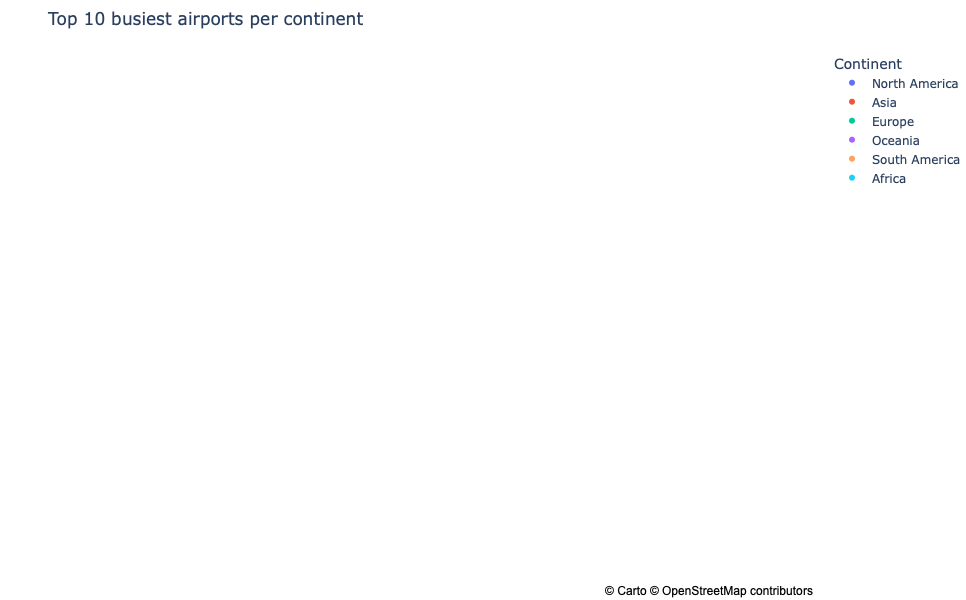

In [143]:
# В этом блоке, мы подсчитываем количество взлетов и посадок
srs = routes['Source airport'].value_counts()
des = routes['Destination airport'].value_counts()

dep_arr = (pd.DataFrame({
    'departures': srs,
    'arrivals':   des
})
    .fillna(0)
    .astype(int)
)
dep_arr['total_ops'] = dep_arr['departures'] + dep_arr['arrivals']
dep_arr = dep_arr.reset_index().rename(columns={'index': 'IATA'})

# До/Авто определяем реальные имена столбцов в iata_airports
cols = iata_airports.columns.tolist()
print("iata_airports columns:", cols)
name_cands = ['Name of airport', 'Airport Name', 'name', 'Name']
for c in name_cands:
    if c in cols:
        name_col = c
        break
else:
    raise KeyError(f"Не найден столбец названия аэропорта (ищут: {name_cands})")

# Формирование методанных аэропотов в общем и целом 
lat_cands = ['Latitude', 'latitude', 'Lat']
lon_cands = ['Longitude', 'longitude', 'Lon']
for c in lat_cands:
    if c in cols:
        lat_col = c
        break
else:
    raise KeyError(f"Не найден столбец широты (ищут: {lat_cands})")
for c in lon_cands:
    if c in cols:
        lon_col = c
        break
else:
    raise KeyError(f"Не найден столбец долготы (ищут: {lon_cands})")

cont_cands = ['Continent', 'continent', 'Continents']
for c in cont_cands:
    if c in cols:
        cont_col = c
        break
else:
    raise KeyError(f"Не найден столбец континента (ищут: {cont_cands})")

meta = (
    iata_airports
    .loc[:, ['IATA', name_col, 'City', 'Country', cont_col, lat_col, lon_col]]
    .rename(columns={
        name_col: 'Airport Name',
        cont_col: 'Continent',
        lat_col:  'Lat',
        lon_col:  'Lon'
    })
)

# Объединяе статистики с метаданными
merged = dep_arr.merge(meta, on='IATA', how='inner')

# Берём топ-10 аэропортов в каждом континенте
top10 = (
    merged
    .sort_values('total_ops', ascending=False)
    .groupby('Continent', group_keys=False)
    .head(10)
)

# Собираем итоговый DataFrame
df_result = (
    top10
    .set_index(['Continent', 'Airport Name'])
    [['Country', 'City', 'IATA', 'total_ops']]
    .rename(columns={'total_ops': 'number_departures_of_arrivals'})
    .sort_index(level=0)
)

print("\nТоп-10 самых больших аэропортов по континентам:")
display(df_result)


fig = px.scatter_mapbox(
    top10,
    lat='Lat',
    lon='Lon',
    color='Continent',
    hover_name='Airport Name',
    hover_data=['City', 'Country', 'total_ops'],
    zoom=1,
    height=600,
    mapbox_style='carto-positron',
    title='Top 10 busiest airports per continent'
)

fig.update_layout(margin={'l':0,'r':0,'t':50,'b':0})
fig.show()


## Задание 7.
В табличке `csv_routes_v1.csv` есть колонка `Equipment` - это код марки самолета в кодах IATA. Тут есть их расшифровка
https://en.wikipedia.org/wiki/List_of_aircraft_type_designators (если указаны два и более борта, считаем по первому).

Найдите 10 самых популярных моделей самолетов, естественно с расшифровкой, с указанием количества рейсов выполняемых этими бортами (по числу посадок :)). Результат в виде датафрейма. Индекс номер по порядку, колонки - марка самолета и количество рейсов. Упорядочить от наибольшего количества рейсов вниз. 

In [131]:
# оставляем только первый код борта (если там "320 321" – возьмём "320")
routes['Equipment'] = routes['Equipment'].str.split().str[0]

url = 'https://en.wikipedia.org/wiki/List_of_aircraft_type_designators'
wiki_tables = pd.read_html(url, header=0)
print(wiki_tables[0].columns)   # убедимся, что среди них 'IATA type code' и 'Model'

dji = wiki_tables[0][['IATA type code', 'Model']] \
      .rename(columns={'IATA type code':'Equipment'})

merged = pd.merge(
    routes,
    dji,
    on='Equipment',
    how='left'
)

merged = merged[merged['Model'].notna()]

# считаем число рейсов (=число записей, то есть посадок) по каждой модели
top10 = (
    merged
      .groupby('Model')
      .size()
      .sort_values(ascending=False)
      .head(10)
      .reset_index(name='Flights')
)

top10.index = top10.index + 1
display(top10)

Index(['ICAO code[3]', 'IATA type code', 'Model'], dtype='object')


,Model,Flights
1,Airbus A320,11865
2,Boeing 737-800,8520
3,Airbus A319,5205
4,Boeing 737-800 Winglets,2566
5,Airbus A321,2145
6,Boeing 737-700 Winglets,1812
7,Embraer 190 / Lineage 1000,1391
8,Aerospatiale/Alenia ATR 72-201/-202,1387
9,Airbus A330-300,1211
10,De Havilland Canada DHC-8-400 Dash 8Q,1097
